In [1]:
#name: Movie Reviews
#type: classification (NLP)
#aim: to classify movie reviews as negative or positive using NLP and Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


### Removing Null Reviews

In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df['review'].str.isspace().sum()

27

In [8]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [9]:
df = df[~df['review'].str.isspace()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [11]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

### EDA on Bag of Words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer(stop_words='english')

In [14]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews:\n")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews:

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [15]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews:\n")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews:

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

X = df['review']
y=df['label'].map({'neg':1, 'pos':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Testing various models

In [17]:
from sklearn.model_selection import cross_validate

def evaluate_model(model):
    scores=cross_validate(model,X_train_tfidf,y_train,cv=5,scoring=['accuracy','precision','recall'])
    acc=scores['test_accuracy'].mean()
    prec=scores['test_precision'].mean()
    rec=scores['test_recall'].mean()
    print("Average Accuracy: {}".format(acc))
    print("Average Precision: {}".format(prec))
    print("Average Recall: {}".format(rec))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf=TfidfVectorizer()

In [20]:
X_train_tfidf= tfidf.fit_transform(X_train)

In [21]:
X_test=tfidf.transform(X_test)

### Multinomial NB

In [22]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [23]:
evaluate_model(mnb)

Average Accuracy: 0.8096433158778776
Average Precision: 0.7706002781328676
Average Recall: 0.8843087027914613


### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [25]:
evaluate_model(lr)

Average Accuracy: 0.8170832921648058
Average Precision: 0.8161444729068961
Average Recall: 0.8224433497536946


### LinearSVC

In [26]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()

In [27]:
evaluate_model(lsvc)

Average Accuracy: 0.8509139413101472
Average Precision: 0.8536032594856124
Average Recall: 0.8487422003284072


### Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [29]:
evaluate_model(gbc)

Average Accuracy: 0.7975924645127292
Average Precision: 0.8033121424160943
Average Recall: 0.7903776683087028


## Hyperparamater tuning for best performing algo (Linear SVC)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid= {'C':[1.0,2.0,5.0,10.0]}

In [32]:
grid_model=GridSearchCV(estimator=lsvc,param_grid=param_grid,cv=5,verbose=False, scoring='accuracy')

In [33]:
grid_model.fit(X_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [1.0, 2.0, 5.0, 10.0]}, scoring='accuracy',
             verbose=False)

In [34]:
grid_model.best_estimator_

LinearSVC()

## Final Performance Evaluation

In [35]:
y_pred=grid_model.predict(X_test)

In [36]:
from sklearn.metrics import *

In [37]:
accuracy_score(y_test,y_pred)

0.8402061855670103

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        98
           1       0.83      0.85      0.84        96

    accuracy                           0.84       194
   macro avg       0.84      0.84      0.84       194
weighted avg       0.84      0.84      0.84       194



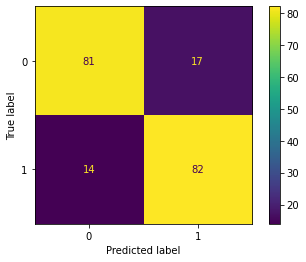

In [39]:
plot_confusion_matrix(grid_model,X_test,y_test);

## Final Model and Pipeline

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
final_model=LinearSVC()

In [42]:
pipe= Pipeline([('tfidf',TfidfVectorizer()), ('svc',LinearSVC())])

In [43]:
y=y.map({0:'Positive',1:'Negative'})

In [44]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

## Saving the Model

In [45]:
import joblib

In [46]:
joblib.dump(pipe, "Movie Review Classification Model.pkl")

['Movie Review Classification Model.pkl']